In [82]:
using QuadGK
using Integrals

In [3]:
using LinearAlgebra
using Plots
using FFTW

In [118]:
cums = [0.0, 100, 0.0, 3.0];

In [119]:
function characteristic_function(x; cumz=cums)
    s = 0. + 0.0im
    for (n, cum) in enumerate(cumz)
        if (n < 20)
            s += cum * ((x*1.0im)^n) / factorial(n)
        else
            # Use stirling's approximation if n > 20
            s += cum * ((x*1.0im)^n) / (n^n * exp(n))
        end
    end
    return exp(s)
end

characteristic_function (generic function with 1 method)

In [120]:
characteristic_function(0.02)

0.9801986929107289 + 0.0im

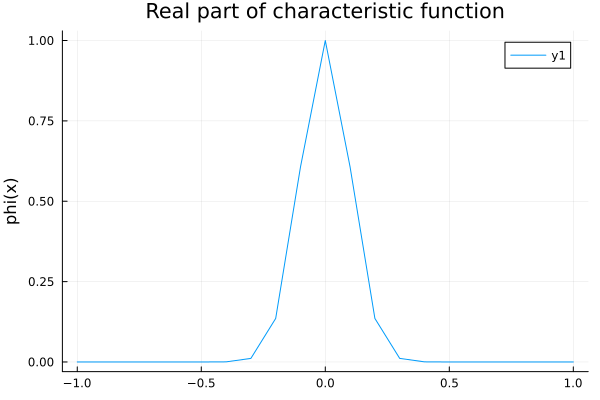

In [121]:
t = -1:0.1:1
plot(t, real.(characteristic_function.(t)), title="Real part of characteristic function", ylabel="phi(x)")

In [122]:
y = -200:0.01:200
ϕ = characteristic_function.(y)
F = fftshift(fft(ϕ)); # Fourier transform of characteristic function gives us the distribution

In [123]:
function P(x)
    i = argmin(abs.(y .- x))
    return abs(real(F[i]))
end

P (generic function with 1 method)

In [124]:
norm, _ = quadgk(P, -Inf, Inf)

LoadError: DomainError with 0.0:
integrand produced NaN in the interval (-1.0, 1.0)

In [105]:
function prob(x)
    return P(x)/norm
end

prob (generic function with 1 method)

In [106]:
quadgk(prob, -Inf, Inf)

(0.9999999999999996, 0.5094693867009864)

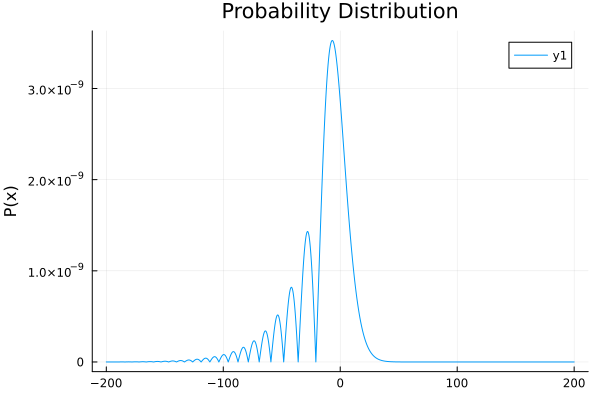

In [107]:
plot(y, prob, title="Probability Distribution", ylabel="P(x)")

In [91]:
import Pkg; Pkg.add("MCIntegration")
using MCIntegration

   Resolving package versions...
   Installed MCIntegration ─ v0.4.2
    Updating `~/.julia/environments/v1.11/Project.toml`
  [ea1e2de9] + MCIntegration v0.4.2
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [ea1e2de9] + MCIntegration v0.4.2
Precompiling project...
   2456.4 ms  ✓ MCIntegration
   2215.0 ms  ✓ Integrals → IntegralsMCIntegrationExt
  2 dependencies successfully precompiled in 6 seconds. 753 already precompiled.


In [117]:
x3prob(x, p) = (x^4)*prob(x)
intprob = IntegralProblem(x3prob, (-Inf, Inf))
sol = solve(intprob, QuadGKJL(), reltol = 1e-3, abstol = 1e-3)

retcode: Success
u: 2.9178357209792694e62

In [111]:
sol.u

-1.4317526748846931e-6

In [8]:
# Smoothing via moving averages

binsize = 150

K = abs.(real.(prob))

mov = []
xaxis = []
for i in 1:(length(enumerate(K))-binsize)
    sum = 0
    for j in 1:binsize
        sum += K[i+j-1]
    end
    push!(mov, sum/binsize)
    push!(xaxis, x[i])
end

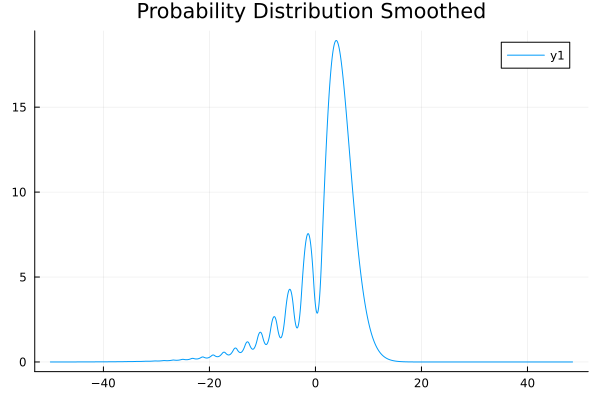

In [9]:
plot(xaxis, mov, title="Probability Distribution Smoothed")

In [76]:
using Turing
using StatsPlots